In [7]:
#install packages
!pip install yfinance==0.1.67
#!pip install pandas==1.3.3
#!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y
#!pip install plotly==5.3.1


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.15.3) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

pkgs/main/linux-64       [>                   ] (--:--) No change
pkgs/main/linux-

In [8]:
#import libraries
import yfinance 
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [9]:
#extract data of GE stock performance using yfinance
general_electric = yfinance.Ticker("GE")
ge_data = general_electric.history(period="max")
ge_data.reset_index(inplace=True)
ge_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,1.014261,1.031165,1.004118,1.010880,269568,0.0,0.0
1,1962-01-03,1.005809,1.005809,0.997356,1.000737,184704,0.0,0.0
2,1962-01-04,1.000737,1.009189,0.980452,0.988904,229632,0.0,0.0
3,1962-01-05,0.988904,0.990594,0.946643,0.963547,340704,0.0,0.0
4,1962-01-08,0.963548,0.963548,0.933120,0.961857,386880,0.0,0.0
...,...,...,...,...,...,...,...,...
15202,2022-05-23,76.019997,76.400002,75.010002,75.459999,5275400,0.0,0.0
15203,2022-05-24,74.730003,74.870003,72.059998,74.519997,6129100,0.0,0.0
15204,2022-05-25,73.470001,74.589996,72.620003,74.529999,7096000,0.0,0.0
15205,2022-05-26,75.220001,77.709999,74.699997,77.010002,4690300,0.0,0.0


In [10]:
#extract GE stock performance data from URL 'Macrotrends'
url = 'https://www.macrotrends.net/stocks/charts/GE/general-electric/stock-price-history'
html_data = requests.get(url).text 

In [13]:
#parse with BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

In [38]:
# create dataframe using soup
ge_price = pd.DataFrame(columns = ['Date', 'Average Annual Price'])
for row in soup.find_all("tbody")[0].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    avg = col[1].text
    ge_price = ge_price.append({"Date":date, "Average Annual Price":avg}, ignore_index=True)
ge_price.head()

,Date,Average Annual Price
0,2022,90.3215
1,2021,102.1231
2,2020,65.8413
3,2019,78.6870
4,2018,103.1910


In [77]:
# create dataframe using read_html
ge_price = pd.read_html(url)[0]
ge_price.columns = ['Year', 'Average Annual', 'Open', 'High', 'Low', 'Close', 'Annual Change']
ge_price.head()

,Year,Average Annual,Open,High,Low,Close,Annual Change
0,2022,90.3215,96.24,103.16,72.44,78.76,-16.63%
1,2021,102.1231,83.76,114.80,83.76,94.47,9.34%
2,2020,65.8413,95.44,105.28,43.92,86.40,-3.23%
3,2019,78.6870,64.40,92.64,63.44,89.28,47.42%
4,2018,103.1910,143.84,152.16,53.68,60.56,-56.62%


In [79]:
# cleaning dataframe
ge_price['Annual Change'] = ge_price['Annual Change'].str.replace(',|\%',"")
ge_price.dropna(inplace=True)
ge_price = ge_price[ge_price['Annual Change'] != ""]
ge_price.head()
ge_price.dtypes

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



Year                int64
Average Annual    float64
Open              float64
High              float64
Low               float64
Close             float64
Annual Change      object
dtype: object

In [80]:
ge_price['Annual Change'] = pd.to_numeric(ge_price['Annual Change'])
ge_price.dtypes

Year                int64
Average Annual    float64
Open              float64
High              float64
Low               float64
Close             float64
Annual Change     float64
dtype: object

<AxesSubplot:xlabel='Year', ylabel='Price, USD'>

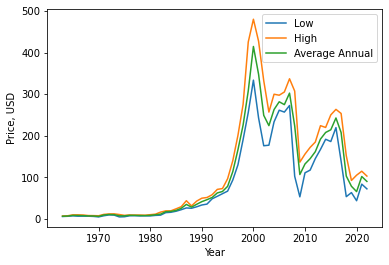

In [81]:
ge_price.plot(x="Year", y=['Low', 'High', 'Average Annual'], ylabel = 'Price, USD')


<AxesSubplot:xlabel='Year', ylabel='Annual Change, %'>

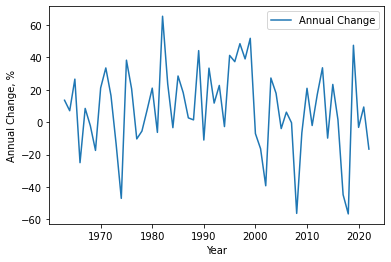

In [83]:
ge_price.plot(x="Year", y='Annual Change', ylabel = 'Annual Change, %')